
##### Install the dependencies faker library



In [ ]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.4 MB/s eta 0:00:00


#####Imprort faker library

In [ ]:
from faker import Faker

#####Using it to generate fake data for 10k students

In [ ]:
import random
import pandas as pd
# Initialize Faker
fake = Faker()

# Define subjects
subjects = ["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]

# Generate student data
students = []
for student_id in range(1, 10001):  # 10,000 students
    student_name = fake.name()  # Generate a fake name
    department = random.choice(["CSE", "ECE", "IT", "EEE"])  # Choose a random department
    year = random.randint(1, 4)  # Choose a random year (1st - 4th)

    # Generate marks for each subject (0 to 100)
    marks = {subject: random.randint(30, 100) for subject in subjects}

    # Create student dictionary
    student = {
        "Student_ID": student_id,
        "Name": student_name,
        "Department": department,
        "Year": year,
        **marks  # Unpacking marks dictionary
    }
    students.append(student)

# Convert to Pandas DataFrame
df = pd.DataFrame(students)

# Save to CSV
df.to_csv("students_data.csv", index=False)

print("Student data generated successfully!")

Student data generated successfully!


#####Data generated successfully and now it is time for hadoop to come into picture

##### Reading the dataset to confirm the data in it

In [ ]:
df.head()

,Student_ID,Name,Department,Year,Electronics,Mathematics,DSA,Programming,Database,Data Science
0,1,Matthew Moore,ECE,4,89,61,88,47,45,48
1,2,Amy Johnson,EEE,3,82,90,58,31,82,41
2,3,Maria Delgado,ECE,3,87,56,85,48,44,35
3,4,Rebecca Campos,IT,3,77,41,72,43,73,91
4,5,John Barber,CSE,4,64,35,56,40,83,85


#####Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Student_ID    10000 non-null  int64 
 1   Name          10000 non-null  object
 2   Department    10000 non-null  object
 3   Year          10000 non-null  int64 
 4   Electronics   10000 non-null  int64 
 5   Mathematics   10000 non-null  int64 
 6   DSA           10000 non-null  int64 
 7   Programming   10000 non-null  int64 
 8   Database      10000 non-null  int64 
 9   Data Science  10000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,Student_ID,Year,Electronics,Mathematics,DSA,Programming,Database,Data Science
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.514400,65.209700,64.917000,65.212600,65.189500,65.046200,64.885700
std,2886.89568,1.121034,20.689397,20.492918,20.622733,20.582472,20.374842,20.562551
min,1.00000,1.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
25%,2500.75000,2.000000,47.000000,47.000000,47.000000,47.000000,48.000000,47.000000
50%,5000.50000,3.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
75%,7500.25000,4.000000,83.000000,83.000000,83.000000,83.000000,82.000000,83.000000
max,10000.00000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
df.isna().sum()

,0
Student_ID,0
Name,0
Department,0
Year,0
Electronics,0
Mathematics,0
DSA,0
Programming,0
Database,0
Data Science,0


In [ ]:
df.nunique()

,0
Student_ID,10000
Name,9382
Department,4
Year,4
Electronics,71
Mathematics,71
DSA,71
Programming,71
Database,71
Data Science,71


#####Visualizing the pre-processed data by importing seaborn library and using pariplot since the dataset is very huge the output is like this

In [ ]:
import seaborn as sns

#####Using the heatmap for better visualization for which i imported seaborn library

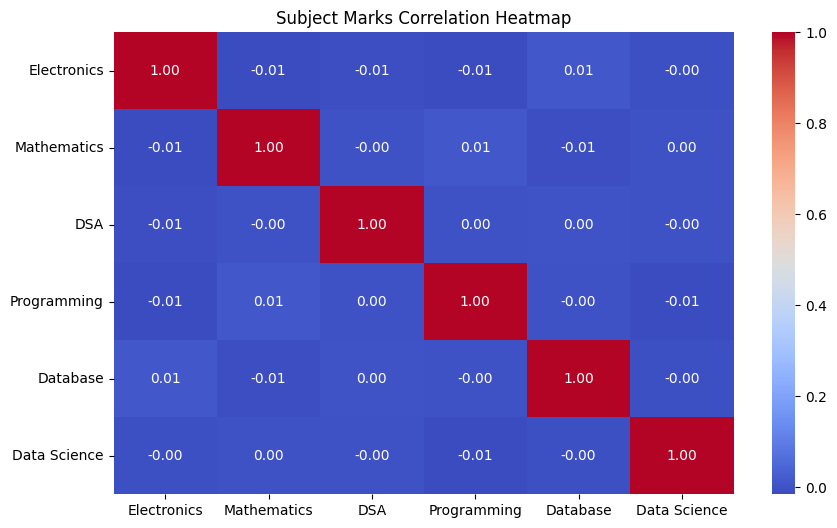

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Subject Marks Correlation Heatmap")
plt.show()

In [ ]:
from multiprocessing import Pool

# Define subjects
subjects = ["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]

def mapper(row):
    """
    Simulates the Mapper function by extracting subject marks
    """
    student_id = row["Student_ID"]
    output = []

    for subject in subjects:
        output.append((subject, row[subject]))  # Key-Value pairs (subject, marks)

    return output

# Apply the mapper function to all rows
with Pool() as pool:
    mapped_data = pool.map(mapper, [row for _, row in df.iterrows()])

# Flatten the mapped output
mapped_data = [item for sublist in mapped_data for item in sublist]

# Display sample output from the mapper
mapped_data[:10]  # First 10 key-value pairs

[('Electronics', 89),
 ('Mathematics', 61),
 ('DSA', 88),
 ('Programming', 47),
 ('Database', 45),
 ('Data Science', 48),
 ('Electronics', 82),
 ('Mathematics', 90),
 ('DSA', 58),
 ('Programming', 31)]

#####Now its time for data analysis, first starting with the pass or fail analysis

In [ ]:
# Define passing marks (e.g., 40)
import pandas as pd
passing_marks = 40


# Calculate pass and fail counts per subject
pass_fail_stats = pd.DataFrame({
    "Pass Count": (df[subjects] >= passing_marks).sum(),
    "Fail Count": (df[subjects] < passing_marks).sum()
})

# Calculate Pass Percentage
pass_fail_stats["Pass Percentage"] = (pass_fail_stats["Pass Count"] / len(df)) * 100

print(pass_fail_stats)


              Pass Count  Fail Count  Pass Percentage
Electronics         8591        1409            85.91
Mathematics         8549        1451            85.49
DSA                 8621        1379            86.21
Programming         8612        1388            86.12
Database            8597        1403            85.97
Data Science        8550        1450            85.50


#####Calculating the average marks of the students

In [ ]:
# List of subjects
subjects = ["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]

# Compute the average marks per student
df["Average Marks"] = df[subjects].mean(axis=1)

# Display the first few rows to verify
print(df.head())


   Student_ID            Name Department  Year  Electronics  Mathematics  DSA  \
0           1   Matthew Moore        ECE     4           89           61   88   
1           2     Amy Johnson        EEE     3           82           90   58   
2           3   Maria Delgado        ECE     3           87           56   85   
3           4  Rebecca Campos         IT     3           77           41   72   
4           5     John Barber        CSE     4           64           35   56   

   Programming  Database  Data Science  Average Marks  
0           47        45            48      63.000000  
1           31        82            41      64.000000  
2           48        44            35      59.166667  
3           43        73            91      66.166667  
4           40        83            85      60.500000  


#####After calculating avg marks of the students now its time to perform regression analysis on it, using linear regression to see how each subjects marks contribute to his overall performance

In [ ]:
from sklearn.linear_model import LinearRegression
# Define features (subject marks) and target (overall average)
X = df[["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]]
y = df["Average Marks"]

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get regression coefficients
coefficients = pd.DataFrame({
    "Subject": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

        Subject  Coefficient
0   Electronics     0.166667
1   Mathematics     0.166667
2           DSA     0.166667
3   Programming     0.166667
4      Database     0.166667
5  Data Science     0.166667


#####Based on the above linear regression's coefficients we can say that the model is treating all the subjects in a equal manner and no subject has more influence of any other subject in the final score calculation

#####Performing the grade distribution analysis i.e calculating the grades of the students

Grade
C       3811
B       3804
A       1149
D        848
Fail     306
A+        74
O          8
Name: count, dtype: int64


<ipython-input-16-edcd428b4eac>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_distribution.index, y=grade_distribution.values, palette="coolwarm")


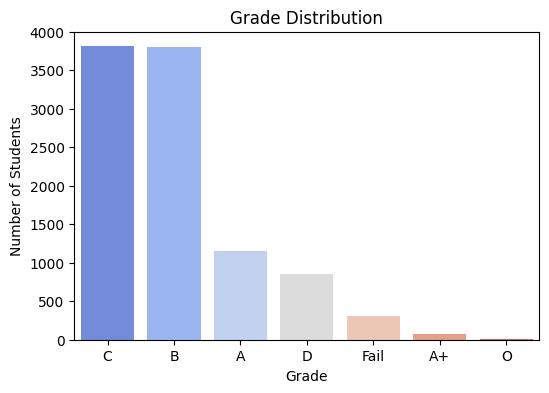

In [ ]:
# Define grading function
def assign_grade(avg):
    if avg >= 90:
        return "O"
    elif avg >= 85:
        return "A+"
    elif avg >= 75:
        return "A"
    elif avg >= 65:
        return "B"
    elif avg >= 55:
        return "C"
    elif avg >= 50:
        return "D"
    else:
        return "Fail"

# Apply grading function
df["Grade"] = df["Average Marks"].apply(assign_grade)

# Count students per grade
grade_distribution = df["Grade"].value_counts()

print(grade_distribution)

# Visualizing Grade Distributions

plt.figure(figsize=(6, 4))
sns.barplot(x=grade_distribution.index, y=grade_distribution.values, palette="coolwarm")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.title("Grade Distribution")
plt.show()

#####The above graph gives a detailed analysis on what are the grades that the students acheived in the examinations and the management can use to get an idea of how to improve the students and can asses the students from which cateogary they are in.

In [ ]:
# Top 10 Students
top_students = df.nlargest(10, "Average Marks")
# Bottom 10 Students
bottom_students = df.nsmallest(10, "Average Marks")

print("Top 10 Students:\n", top_students[["Student_ID", "Average Marks"]])
print("\nBottom 10 Students:\n", bottom_students[["Student_ID", "Average Marks"]])

Top 10 Students:
       Student_ID  Average Marks
729          730      95.333333
9674        9675      92.500000
2809        2810      92.000000
2577        2578      91.333333
2946        2947      91.333333
2058        2059      90.666667
3086        3087      90.166667
9879        9880      90.000000
3067        3068      89.833333
675          676      89.666667

Bottom 10 Students:
       Student_ID  Average Marks
1631        1632      39.500000
4724        4725      39.666667
498          499      40.166667
5572        5573      40.833333
972          973      41.000000
2978        2979      41.000000
8745        8746      41.000000
1175        1176      41.166667
3098        3099      41.166667
347          348      41.333333


#####Here in the above we can observe the top and bottom 10 students and using this we can concnetrate on how these people perform and how to even more upgrade them.

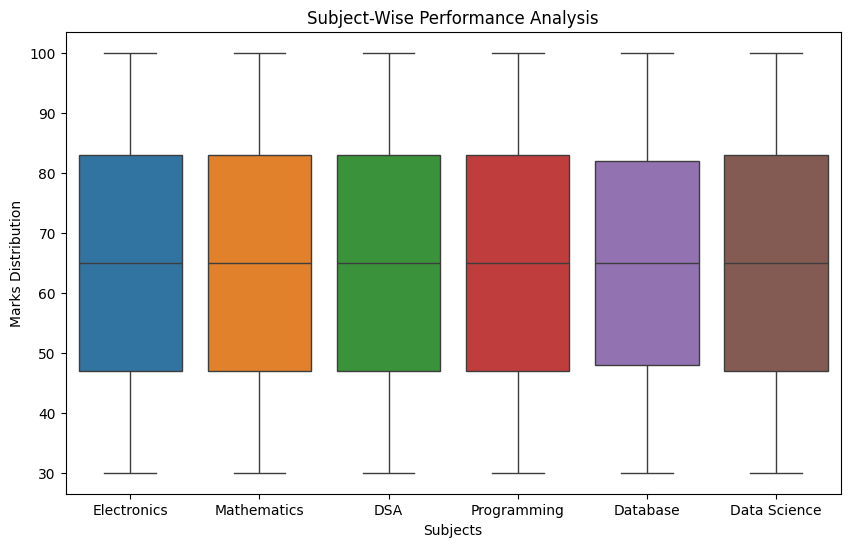

In [ ]:
# Boxplot for subject-wise distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[subjects])
plt.xlabel("Subjects")
plt.ylabel("Marks Distribution")
plt.title("Subject-Wise Performance Analysis")
plt.show()

#####The above plotting shows the marks distribution of various students in different subject
######Here it is showing the analysis in the same way cause i have used faker library but for real-time data it will be quite different.

   Department  Year  Student_Count
0         CSE     1            635
1         CSE     2            665
2         CSE     3            654
3         CSE     4            649
4         ECE     1            641
5         ECE     2            604
6         ECE     3            639
7         ECE     4            652
8         EEE     1            581
9         EEE     2            542
10        EEE     3            628
11        EEE     4            651
12         IT     1            626
13         IT     2            630
14         IT     3            604
15         IT     4            599


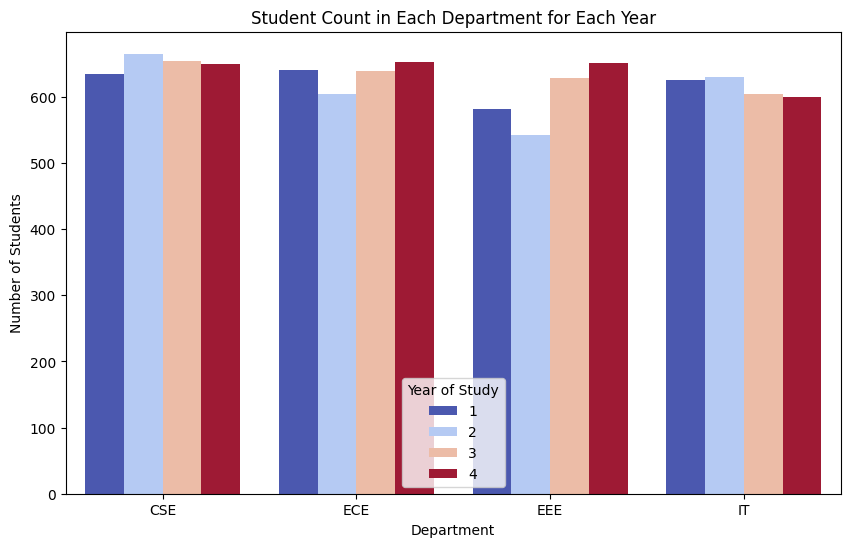

In [ ]:
# Count the number of students in each department for each year
dept_year_counts = df.groupby(["Department", "Year"]).size().reset_index(name="Student_Count")

# Display the student count per department per year
print(dept_year_counts)

# Visualizing the student distribution
plt.figure(figsize=(10, 6))
sns.barplot(x="Department", y="Student_Count", hue="Year", data=dept_year_counts, palette="coolwarm")
plt.xlabel("Department")
plt.ylabel("Number of Students")
plt.title("Student Count in Each Department for Each Year")
plt.legend(title="Year of Study")
plt.show()

#####The above graph shows how many students are present in a particular department in a particular year

count    10000.000000
mean         6.507678
std          0.832673
min          3.950000
25%          5.933333
50%          6.500000
75%          7.066667
max          9.533333
Name: CGPA, dtype: float64


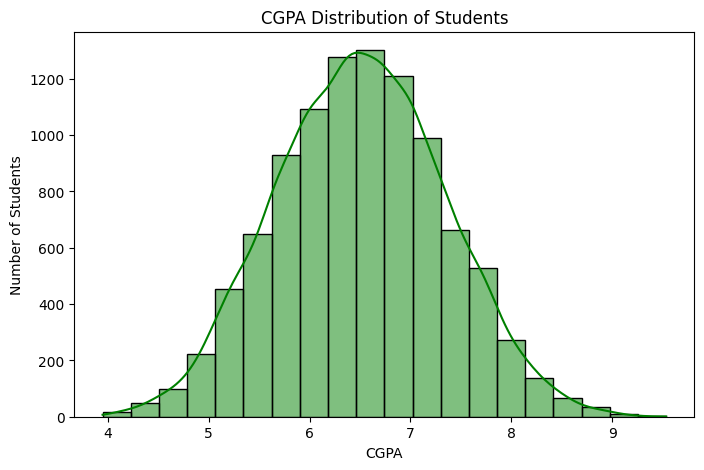

In [ ]:
# Convert marks (out of 100) to CGPA (out of 10)
df["CGPA"] = df[subjects].mean(axis=1) / 10

# Display summary statistics
print(df["CGPA"].describe())

# Visualizing CGPA Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["CGPA"], bins=20, kde=True, color="green")
plt.xlabel("CGPA")
plt.ylabel("Number of Students")
plt.title("CGPA Distribution of Students")
plt.show()


#####This plotting shows the cgpa distribution of the students

#####The below code helps us to find the cgpa distribution of the students department wise, it will be a even more detailed analysis

Average CGPA per Department:
 Department
ECE    6.493237
CSE    6.505769
EEE    6.510297
IT     6.522035
Name: CGPA, dtype: float64


<ipython-input-22-bf109a12d951>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_cgpa.index, y=dept_cgpa.values, palette="viridis")


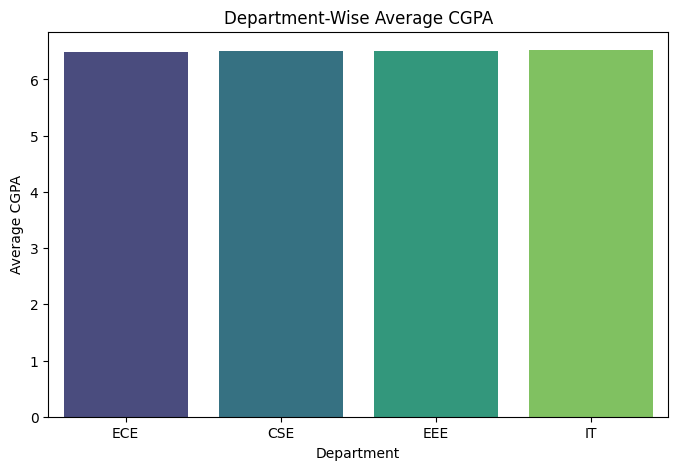

In [ ]:
# Calculate average CGPA per department
dept_cgpa = df.groupby("Department")["CGPA"].mean().sort_values()

print("Average CGPA per Department:\n", dept_cgpa)

# Visualizing department-wise CGPA
plt.figure(figsize=(8, 5))
sns.barplot(x=dept_cgpa.index, y=dept_cgpa.values, palette="viridis")
plt.xlabel("Department")
plt.ylabel("Average CGPA")
plt.title("Department-Wise Average CGPA")
plt.show()

Average CGPA per Year:
 Year
1    6.486998
2    6.523160
3    6.497993
4    6.522579
Name: CGPA, dtype: float64


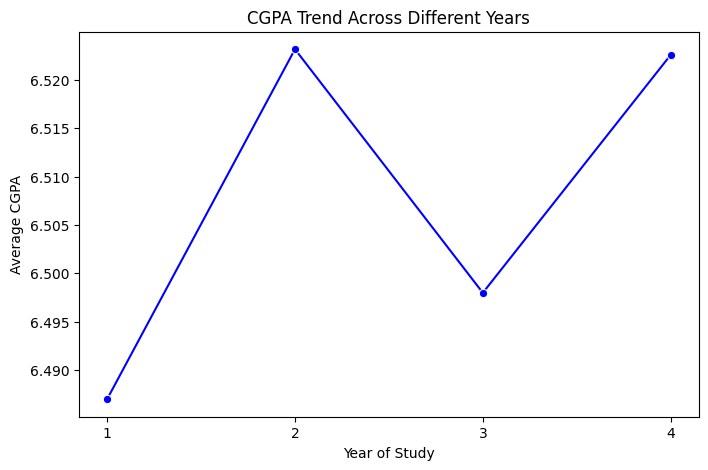

In [ ]:
# Calculate average CGPA per year
year_cgpa = df.groupby("Year")["CGPA"].mean()

print("Average CGPA per Year:\n", year_cgpa)

# Visualizing year-wise CGPA trend
plt.figure(figsize=(8, 5))
sns.lineplot(x=year_cgpa.index, y=year_cgpa.values, marker="o", color="blue")
plt.xlabel("Year of Study")
plt.ylabel("Average CGPA")
plt.title("CGPA Trend Across Different Years")
plt.xticks([1, 2, 3, 4])
plt.show()

#####The above graph shows the years wise cgpa analysis

###These are the basic analysis any body managing a result management system would need, this concludes this basic project of Result Management System.